In [18]:
# Import the packages we may need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from seaborn import set_style
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_selection import RFECV 

In [19]:
#Random forest for feature importances
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


## This sets the plot style
## to have a grid on a white background
set_style("whitegrid")


In [20]:
df = pd.read_csv('Combined_df2_imputedMean.csv')
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Sample_ID,Cancer,Q15389,P29965,P49763,Q02763,P01127,...,P09382,Q16790,P26842,P14210,P43489,O75144,O43927,P32970,Q8WXI7,P10144
0,0,0,0.0,PM910,Ctrl,10.12895,5.62622,7.72902,8.47530,10.08926,...,8.54519,4.20874,10.61404,8.37166,4.99296,7.78219,7.03584,4.81481,3.58965,4.13563
1,1,1,1.0,PM396,Ctrl,8.67289,5.18821,8.25523,9.06271,8.89866,...,8.25401,3.46839,10.77271,8.36820,4.92422,7.47997,8.05700,3.98900,4.78155,3.14840
2,2,2,2.0,PM190,Ctrl,9.99567,6.38876,8.44263,8.42102,10.08508,...,8.75887,4.65936,11.03062,9.18464,5.60743,7.92803,8.77261,4.80189,5.16350,4.29062
3,3,3,3.0,PM270,Ctrl,8.26407,5.06228,8.13429,8.66165,8.75925,...,8.75741,4.44633,10.47952,8.65548,5.54289,9.29458,8.64028,4.04045,5.59217,3.75295
4,4,4,4.0,PM656,Ctrl,9.08833,5.95005,8.37830,8.29127,9.43936,...,8.48018,3.81634,10.59295,8.63758,5.16271,7.41098,8.29143,4.59594,4.91665,4.10381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,1900,162,NaN,C29ZZ80Y4.01,HODG,9.87819,7.15139,7.71189,7.72042,10.23705,...,7.19963,4.26576,7.80544,9.24521,5.59883,5.16395,9.03873,4.24414,1.53814,5.30002
1901,1901,163,NaN,C29ZS2ML8.01,HODG,9.42403,6.16559,7.48199,7.30005,10.14143,...,6.90334,4.14795,7.74788,8.80026,5.18470,7.53391,7.97077,3.84446,3.41778,3.84928
1902,1902,164,NaN,C29ZFFZ0Q.01,HODG,10.26858,8.11759,7.78457,7.46200,10.25920,...,6.69773,3.60838,7.67268,7.83666,5.35574,5.27098,7.55698,3.11025,1.56641,4.23022
1903,1903,165,NaN,C29ZQOG4N.01,HODG,10.15491,7.09910,7.78078,7.45732,10.27589,...,7.01314,5.67411,8.44027,8.79263,5.66616,7.99492,8.71554,5.02993,3.94930,4.90380


In [21]:
df = df.drop(columns=['Unnamed: 0.2' , 'Unnamed: 0.1', 'Unnamed: 0'])
df

,Sample_ID,Cancer,Q15389,P29965,P49763,Q02763,P01127,P09341,O00182,Q14116,...,P09382,Q16790,P26842,P14210,P43489,O75144,O43927,P32970,Q8WXI7,P10144
0,PM910,Ctrl,10.12895,5.62622,7.72902,8.47530,10.08926,10.58751,8.65712,7.81074,...,8.54519,4.20874,10.61404,8.37166,4.99296,7.78219,7.03584,4.81481,3.58965,4.13563
1,PM396,Ctrl,8.67289,5.18821,8.25523,9.06271,8.89866,9.22360,8.46706,8.18828,...,8.25401,3.46839,10.77271,8.36820,4.92422,7.47997,8.05700,3.98900,4.78155,3.14840
2,PM190,Ctrl,9.99567,6.38876,8.44263,8.42102,10.08508,10.43894,9.09830,9.15899,...,8.75887,4.65936,11.03062,9.18464,5.60743,7.92803,8.77261,4.80189,5.16350,4.29062
3,PM270,Ctrl,8.26407,5.06228,8.13429,8.66165,8.75925,9.24310,8.72250,8.57028,...,8.75741,4.44633,10.47952,8.65548,5.54289,9.29458,8.64028,4.04045,5.59217,3.75295
4,PM656,Ctrl,9.08833,5.95005,8.37830,8.29127,9.43936,9.83732,8.80904,8.18094,...,8.48018,3.81634,10.59295,8.63758,5.16271,7.41098,8.29143,4.59594,4.91665,4.10381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,C29ZZ80Y4.01,HODG,9.87819,7.15139,7.71189,7.72042,10.23705,7.66455,7.96187,8.03016,...,7.19963,4.26576,7.80544,9.24521,5.59883,5.16395,9.03873,4.24414,1.53814,5.30002
1901,C29ZS2ML8.01,HODG,9.42403,6.16559,7.48199,7.30005,10.14143,7.84437,7.17525,7.93368,...,6.90334,4.14795,7.74788,8.80026,5.18470,7.53391,7.97077,3.84446,3.41778,3.84928
1902,C29ZFFZ0Q.01,HODG,10.26858,8.11759,7.78457,7.46200,10.25920,8.15014,7.59132,8.38650,...,6.69773,3.60838,7.67268,7.83666,5.35574,5.27098,7.55698,3.11025,1.56641,4.23022
1903,C29ZQOG4N.01,HODG,10.15491,7.09910,7.78078,7.45732,10.27589,8.17975,7.56307,8.67965,...,7.01314,5.67411,8.44027,8.79263,5.66616,7.99492,8.71554,5.02993,3.94930,4.90380


In [22]:
df.dropna(inplace=True)
#df.isna().sum()

In [23]:
#select only the protein counts columns as independent variables
proteins = df.columns.values.astype(list)[2:]

In [24]:
#make new column with target as 1, all other as 0
df["Blood_cancer"] = np.where(df['Cancer'].isin(['AML', 'CLL', 'BLBCL', 'MYEL', 'HODG']), 1, 0)
df['LUNGC'] = np.where(df[['Cancer']] == 'LUNGC', 1, 0)
df['CRC'] = np.where(df[['Cancer']] == 'CRC', 1, 0)
df['PRC'] = np.where(df[['Cancer']] == 'PRC', 1, 0)
df['GLIOM'] = np.where(df[['Cancer']] == 'GLIOM', 1, 0)
df['OVC'] = np.where(df[['Cancer']] == 'OVC', 1, 0)
df['ESO'] = np.where(df[['Cancer']] == 'ESO', 1, 0)
df['ENDC'] = np.where(df[['Cancer']] == 'ENDC', 1, 0)
df['CVX'] = np.where(df[['Cancer']] == 'CVX', 1, 0)
df['LYMPH'] = np.where(df[['Cancer']] == 'LYMPH', 1, 0)

In [25]:
#df.Cancer.value_counts()

In [26]:
#make sure that samples with the currect cancer type are labled as 1 in proper columns
df.CVX.sum()

102

In [27]:
df.columns

Index(['Sample_ID', 'Cancer', 'Q15389', 'P29965', 'P49763', 'Q02763', 'P01127',
       'P09341', 'O00182', 'Q14116', 'P09601', 'Q92583', 'P10147', 'P09237',
       'P07585', 'P39900', 'Q9BQ51', 'P01730', 'P13500', 'P09038', 'P10747',
       'P22301', 'Q13241', 'O76036', 'P48061', 'Q9UQV4', 'P42701', 'P18627',
       'P05113', 'Q01151', 'O95727', 'P12544', 'Q9NP84', 'O75509', 'P15692',
       'P01133', 'P05231', 'P50591', 'P35968', 'P20718', 'P48023', 'P09382',
       'Q16790', 'P26842', 'P14210', 'P43489', 'O75144', 'O43927', 'P32970',
       'Q8WXI7', 'P10144', 'Blood_cancer', 'LUNGC', 'CRC', 'PRC', 'GLIOM',
       'OVC', 'ESO', 'ENDC', 'CVX', 'LYMPH'],
      dtype='object')

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df, proteins, and other variables are defined

# Initialize accuracy scores array and dictionaries for feature importances and protein counts
accuracy_scores = np.zeros((10, 2))  # Stores cross-validation scores for RF and ET
feature_importance_dict = {}  # To store feature importances for each cancer type
protein_counts = {protein: 0 for protein in proteins}  # Count occurrences of each protein

# Cross-validation folds
cv_folds = 5
train_accuracies = []
val_accuracies = []

# Loop over each target (assuming the target columns start from index 51)
for i in range(10):
    smote = SMOTE(random_state=100)
    
    # Train-test split for each target (target column at index 51 + i)
    df_train, df_test = train_test_split(df,
                                         shuffle=True,
                                         random_state=100,
                                         test_size=0.2,
                                         stratify=df.iloc[:, (51 + i)])

    # Fit and resample using SMOTE
    resampled_X, resample_y = smote.fit_resample(df_train[proteins], df_train.iloc[:, (51 + i)])

    # Create StratifiedKFold cross-validation split to ensure balanced splits
    kf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=100)
    
    # Create pipelines for RandomForest and ExtraTrees models with regularization to reduce overfitting
    rf_pip = Pipeline([
        ("scale", StandardScaler()), 
        ("rf", RandomForestClassifier(random_state=100, max_depth=8, min_samples_split=6, min_samples_leaf=4))
    ])
    et_pip = Pipeline([
        ("scale", StandardScaler()), 
        ("et", ExtraTreesClassifier(random_state=100, max_depth=8, min_samples_split=6, min_samples_leaf=4))
    ])

    # Perform k-fold cross-validation and calculate accuracy
    rf_cv_scores = cross_val_score(rf_pip, resampled_X, resample_y, cv=kf, scoring='accuracy')
    et_cv_scores = cross_val_score(et_pip, resampled_X, resample_y, cv=kf, scoring='accuracy')

    accuracy_scores[i, 0] = rf_cv_scores.mean()  # RandomForest mean accuracy
    accuracy_scores[i, 1] = et_cv_scores.mean()  # ExtraTrees mean accuracy
    
    # Collecting training and validation accuracies across folds
    fold_train_accuracies = []
    fold_val_accuracies = []
    y_true = []  # True labels for validation
    y_pred = []  # Predicted labels for validation
    
    for train_index, val_index in kf.split(resampled_X, resample_y):
        # Split the data into training and validation sets
        X_train, X_val = resampled_X.iloc[train_index], resampled_X.iloc[val_index]
        y_train, y_val = resample_y.iloc[train_index], resample_y.iloc[val_index]
        
        # Train the model on the training fold
        rf_pip.fit(X_train, y_train)
        
        # Predict on the validation fold
        predictions = rf_pip.predict(X_val)
        y_true.extend(y_val)
        y_pred.extend(predictions)
        
        # Calculate fold-wise accuracies
        fold_train_accuracies.append(accuracy_score(y_train, rf_pip.predict(X_train)))
        fold_val_accuracies.append(accuracy_score(y_val, predictions))
    
    # Store mean accuracies across folds
    train_accuracies.append(np.mean(fold_train_accuracies))
    val_accuracies.append(np.mean(fold_val_accuracies))
    
    # Get feature importances from the fitted RandomForest model
    rf_pip.fit(resampled_X, resample_y)
    feature_importances = rf_pip.named_steps['rf'].feature_importances_

    # Rank features based on their importance
    ranked_importances = pd.Series(feature_importances, index=proteins).sort_values(ascending=False)

    # Store the ranked features in the dictionary
    feature_importance_dict[df.columns[51 + i]] = ranked_importances.index.tolist()
    
    # Count occurrences of each protein based on importance ranking
    for protein in ranked_importances.index:
        protein_counts[protein] += 1







In [29]:
# Print mean accuracy scores for both models
print("Random Forest Mean Accuracy-CV: ", np.mean(accuracy_scores[:, 0]))
print("Extra Trees Mean Accuracy-CV: ", np.mean(accuracy_scores[:, 1]))

# Optionally, print the accuracy scores for each cancer type
label = df.columns[51:]

report = pd.DataFrame(accuracy_scores, columns=["Random Forest-CV", "Extra Trees-CV"])
report.insert(0, "target", label)
report

Random Forest Mean Accuracy-CV:  0.952994211085571
Extra Trees Mean Accuracy-CV:  0.908998940684514


,target,Random Forest-CV,Extra Trees-CV
0,Blood_cancer,0.961386,0.923168
1,LUNGC,0.897710,0.831679
2,CRC,0.909054,0.848553
3,PRC,0.925031,0.866568
4,GLIOM,0.969815,0.931815
5,OVC,0.966483,0.920609
6,ESO,1.000000,1.000000
7,ENDC,0.952187,0.892594
8,CVX,0.959087,0.908111
9,LYMPH,0.989189,0.966892


In [30]:
# Training Accuracy, Validation Accuracy

label = df.columns[51:]

# Creating the report DataFrame
report = pd.DataFrame({
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": val_accuracies
})

# Insert the target column at the start
report.insert(0, "Target", label)

# Set column names 
report.columns = ["Target", "Training Accuracy", "Validation Accuracy"]

# Display the final DataFrame
report

,Target,Training Accuracy,Validation Accuracy
0,Blood_cancer,0.986642,0.961386
1,LUNGC,0.957443,0.897710
2,CRC,0.951466,0.909054
3,PRC,0.952923,0.925031
4,GLIOM,0.994673,0.969815
5,OVC,0.988885,0.966483
6,ESO,1.000000,1.000000
7,ENDC,0.969075,0.952187
8,CVX,0.983010,0.959087
9,LYMPH,0.995946,0.989189


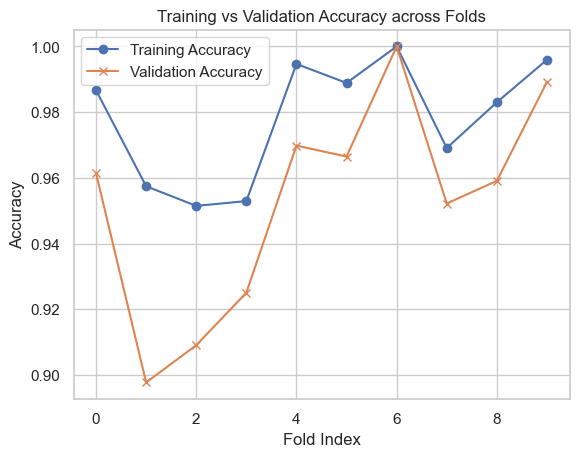

In [31]:
# Visualization of Training vs Validation Accuracy
plt.plot(train_accuracies, label='Training Accuracy', marker='o')
plt.plot(val_accuracies, label='Validation Accuracy', marker='x')
plt.legend(loc='best')
plt.xlabel('Fold Index')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy across Folds')
plt.grid(True)
plt.show()

In [32]:
# Create a DataFrame from the dictionary
importance_df = pd.DataFrame.from_dict(feature_importance_dict, orient='index').transpose()

# Rename columns to match cancer types
importance_df.columns = [df.columns[51 + i] for i in range(10)]

# Fill NaN values with empty strings for better readability
importance_df.fillna('', inplace=True)

# Display the final DataFrame with both proteins and their importances
importance_df.head(10)

,Blood_cancer,LUNGC,CRC,PRC,GLIOM,OVC,ESO,ENDC,CVX,LYMPH
0,P09038,P39900,P09601,P10144,P39900,Q8WXI7,P12544,P50591,P48023,O43927
1,P48061,P10144,P39900,P50591,P18627,P10144,Q92583,P15692,P49763,P10747
2,Q92583,Q9UQV4,P48023,P49763,P43489,P09601,P35968,O43927,P14210,P09341
3,P26842,P48023,P29965,P05231,Q01151,P05231,P13500,P13500,P39900,O75144
4,P18627,P12544,Q8WXI7,O43927,Q9UQV4,P35968,P10144,P09038,Q13241,P20718
5,P32970,P05231,Q14116,Q13241,P05231,P32970,P14210,P09341,P18627,Q9NP84
6,P12544,Q01151,P14210,P09601,O76036,Q14116,P07585,P29965,Q9NP84,P22301
7,P09237,Q92583,P05231,P43489,O75509,P09237,P39900,P39900,Q14116,O95727
8,P01127,P32970,P35968,Q8WXI7,P09237,P29965,P26842,P12544,P07585,P15692
9,O75144,P26842,O75144,P22301,P26842,O75509,P50591,Q92583,P29965,Q9UQV4


In [33]:
# Initialize a dictionary to count occurrences of proteins in the first 10 rows
protein_recurrence_counts = {}

# Get the first 10 rows of the importance_df
top_importance_df = importance_df.head(10)

# Iterate through each column and count occurrences
for column in top_importance_df.columns:
    for protein in top_importance_df[column]:
        if protein:  # Check if the protein is not empty
            if protein in protein_recurrence_counts:
                protein_recurrence_counts[protein] += 1
            else:
                protein_recurrence_counts[protein] = 1

# Convert the counts to a DataFrame for better readability
recurrence_df = pd.DataFrame(list(protein_recurrence_counts.items()), columns=['Protein', 'Recurrence'])

# Display the recurrence counts
recurrence_df.sort_values(by='Recurrence', ascending=False).reset_index(drop=True).head(10)  # Display top 10 proteins by recurrence


,Protein,Recurrence
0,P39900,6
1,P05231,5
2,Q92583,4
3,P26842,4
4,P12544,4
5,P10144,4
6,P29965,4
7,Q14116,3
8,O43927,3
9,P50591,3


<Figure size 1400x1000 with 0 Axes>

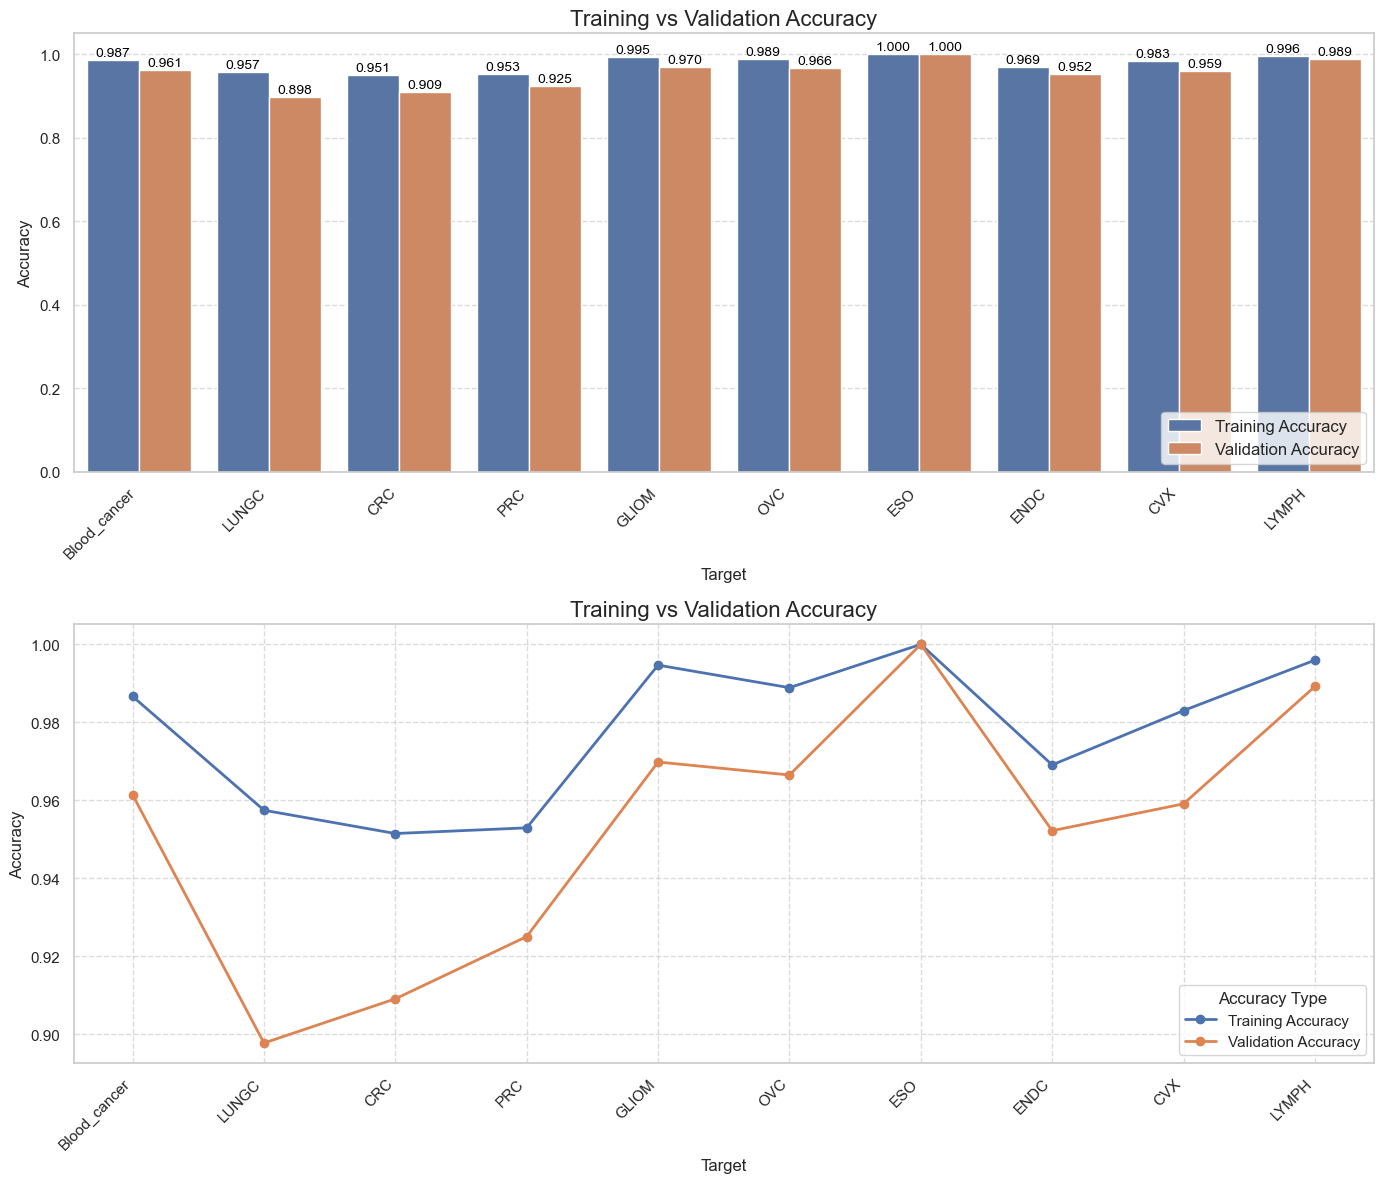

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for easier plotting
df = pd.DataFrame({
    "Target": label,
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": val_accuracies
})

# Set the style for Seaborn
sns.set(style="whitegrid")

# Set figure size
plt.figure(figsize=(14, 10))

# Create a subplot grid (2 rows, 1 column) for both bar plot and line plot
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# **Bar Plot** - Top plot
# Melt the data to make it easier to plot with seaborn
df_melted = df.melt(id_vars="Target", value_vars=["Training Accuracy", "Validation Accuracy"], 
                    var_name="Accuracy Type", value_name="Accuracy")

# Bar plot
sns.barplot(x="Target", y="Accuracy", hue="Accuracy Type", data=df_melted, ci=None, ax=axes[0])

# Rotate x labels for better readability
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")

# Title and labels for the bar plot
axes[0].set_title('Training vs Validation Accuracy', fontsize=16)
axes[0].set_xlabel('Target', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)

# Annotate with the exact accuracy values on top of the bars (rounded to 3 decimal places)
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.3f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     fontsize=10, color='black', 
                     xytext=(0, 5), textcoords='offset points')

# Gridlines for bar plot
axes[0].grid(True, axis='y', linestyle='--', alpha=0.7)

# Move the legend to the lower right of the bar plot
axes[0].legend(loc='lower right', fontsize=12)



# **Line Plot** - Bottom plot
# Line plot comparing Training and Validation Accuracies
df.set_index('Target')[['Training Accuracy', 'Validation Accuracy']].plot(kind='line', ax=axes[1], marker='o', linewidth=2)

# Set the x-ticks to cancer types (Targets) for better labeling
axes[1].set_xticks(range(len(df)))
axes[1].set_xticklabels(df['Target'], rotation=45, ha="right")

# Set the title and labels for the line plot
axes[1].set_title('Training vs Validation Accuracy', fontsize=16)
axes[1].set_xlabel('Target', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)

# Adding gridlines to line plot for clarity
axes[1].grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(title='Accuracy Type', loc='lower right')

# Display the plots with tight layout
plt.tight_layout()

# Show the plot
plt.savefig('Training vs Validation Accuracy Random Forest.png', format='png', dpi=300)
plt.show()
